# Task 2

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [627]:
data = pd.read_csv("resources/QVI_data.csv")
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


## Select Control Stores

Evaluate the performance of a store trial in stores 77, 86, and 88.
Metrics for monthly sales experience of each store:
- total sales revenue
- total number of customers
- average number of transactions per customer

In [628]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['YEARMONTH'] = data['DATE'].dt.strftime("%Y%m").astype(int)
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [629]:
print(f"TXN_ID count: {data['TXN_ID'].count()}")
print(f"Number of unique transactions {data['TXN_ID'].nunique()}")

TXN_ID count: 264834
Number of unique transactions 263125


We should use nunique not count, because there could be multiple purchases of chips within one transaction (one transaction is each unique txn_id)

Get each stores monthly sales. In relation to the metrics above. 

In [630]:
monthly = data.groupby(['YEARMONTH', 'STORE_NBR']).agg(
    TOT_SALES=('TOT_SALES', 'sum'),
    NUM_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique'),
    TOT_TRANSACTIONS=('TXN_ID', 'nunique'), 
    TOT_PROD_QTY=('PROD_QTY', 'sum'),
).reset_index()

monthly['NUM_TRANSACTIONS_PER_CUSTOMER'] = (
    monthly['TOT_TRANSACTIONS'] / monthly['NUM_CUSTOMERS']
)

monthly['NUM_CHIPS_PER_TXN'] = (
    monthly['TOT_PROD_QTY'] / monthly['TOT_TRANSACTIONS']
)

monthly['AVG_PRICE_PER_UNIT'] = (
    monthly['TOT_SALES'] / monthly['TOT_PROD_QTY']
)

monthly.drop(['TOT_TRANSACTIONS', 'TOT_PROD_QTY'], axis=1, inplace=True)

print(len(monthly))
monthly.head()

3169


,YEARMONTH,STORE_NBR,TOT_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TXN,AVG_PRICE_PER_UNIT
0,201807,1,206.9,49,1.061224,1.192308,3.337097
1,201807,2,150.8,39,1.051282,1.121951,3.278261
2,201807,3,1205.7,112,1.232143,1.963768,4.449077
3,201807,4,1399.9,128,1.234375,2.012658,4.402201
4,201807,5,812.0,93,1.290323,2.000000,3.383333


Get the stores that have data for full observation period. (July 2018 to June 2019). 

In [631]:
obs_count = monthly['STORE_NBR'].value_counts()
obs_count_full = obs_count[obs_count == 12].index
full_obs = monthly[monthly['STORE_NBR'].isin(obs_count_full)]
print(len(full_obs))
full_obs.head()

3120


,YEARMONTH,STORE_NBR,TOT_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TXN,AVG_PRICE_PER_UNIT
0,201807,1,206.9,49,1.061224,1.192308,3.337097
1,201807,2,150.8,39,1.051282,1.121951,3.278261
2,201807,3,1205.7,112,1.232143,1.963768,4.449077
3,201807,4,1399.9,128,1.234375,2.012658,4.402201
4,201807,5,812.0,93,1.290323,2.000000,3.383333


Filter these stores to the pre-trial period.

In [632]:
pre_trial_full_obs = full_obs[(full_obs['YEARMONTH'] < 201902)]
print(len(pre_trial_full_obs))
pre_trial_full_obs.head()

1820


,YEARMONTH,STORE_NBR,TOT_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TXN,AVG_PRICE_PER_UNIT
0,201807,1,206.9,49,1.061224,1.192308,3.337097
1,201807,2,150.8,39,1.051282,1.121951,3.278261
2,201807,3,1205.7,112,1.232143,1.963768,4.449077
3,201807,4,1399.9,128,1.234375,2.012658,4.402201
4,201807,5,812.0,93,1.290323,2.000000,3.383333


We have our potential control stores. Now we need to figure out how similar each control store is to each of our trial stores. 

In [633]:
trial_store_nbrs = [77, 86, 88]

In [634]:
def calculate_correlation(inputTable: pd.DataFrame, metricCol, storeComparison: int) -> pd.DataFrame:
    """
    Calculate Pearson correlation for multiple metrics between a trial store and control stores.

    Args:
        inputTable (pd.DataFrame): Data containing monthly metrics for all stores.
        metricCol (list): List of columns to calculate correlation on.
        storeComparison (int): The store number of the trial store.

    Returns:
        pd.DataFrame: A DataFrame with correlation values for all metrics and control stores.
    """
    control_store_nbrs = inputTable[inputTable["STORE_NBR"] != storeComparison]["STORE_NBR"].unique()
    # Set index to YEARMONTH and ensure its sorted so correlation calculated correctly.
    trial_store_data = inputTable[inputTable["STORE_NBR"] == storeComparison].set_index(["YEARMONTH"]).sort_index()

    trial_sales = []

    for control_store_nbr in control_store_nbrs:
        control_store_data = inputTable[inputTable["STORE_NBR"] == control_store_nbr].set_index(["YEARMONTH"]).sort_index()
        
        if metricCol in trial_store_data.columns and metricCol in control_store_data.columns:
            trial_metric = trial_store_data[metricCol]
            control_metric = control_store_data[metricCol]
            
            if len(trial_metric) == len(control_metric):
                corr = trial_metric.corr(control_metric)
                trial_sales.append({
                    "TRIAL_STORE_NBR": storeComparison,
                    "CONTROL_STORE_NBR": control_store_nbr,
                    "METRIC": metricCol,
                    "CORR": corr
                })

    return pd.DataFrame(trial_sales)


In [635]:
corr_table = pd.DataFrame()
for trial_store_num in trial_store_nbrs:
    corr_table = pd.concat([corr_table, calculate_correlation(pre_trial_full_obs, "TOT_SALES", trial_store_num)])
corr_table.reset_index(inplace=True, drop=True)
corr_table.head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR
0,77,1,TOT_SALES,0.075218
1,77,2,TOT_SALES,-0.263079
2,77,3,TOT_SALES,0.806644
3,77,4,TOT_SALES,-0.263300
4,77,5,TOT_SALES,-0.110652


In [636]:
def calculate_distance(inputTable: pd.DataFrame, metricCol: str, storeComparison: int) -> pd.DataFrame:
    """
    Calculate a standardised magnitude distance between a trial store and control stores.

    Args:
        inputTable (pd.DataFrame): Data containing monthly metrics for all stores.
        metricCol (str): The column to calculate magnitude distance on.
        storeComparison (int): The store number of the trial store.

    Returns:
        pd.DataFrame: A DataFrame with magnitude distances for all control stores.
    """
    control_store_nbrs = inputTable[inputTable["STORE_NBR"] != storeComparison]["STORE_NBR"].unique()
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison].set_index(["YEARMONTH"])[metricCol]

    trial_sales = []

    for control_store_nbr in control_store_nbrs:
        control_store = inputTable[inputTable["STORE_NBR"] == control_store_nbr].set_index(["YEARMONTH"])[metricCol]
        
        if len(trial_store) == len(control_store):
            diff = abs(trial_store - control_store)
            
            # Normalize the differences
            diff_norm = (diff - diff.min()) / (diff.max() - diff.min())
            magnitude = 1 - diff_norm.mean()
            
            trial_sales.append({
                "TRIAL_STORE_NBR": storeComparison,
                "CONTROL_STORE_NBR": control_store_nbr,
                "MAGNITUDE": magnitude
            })

    return pd.DataFrame(trial_sales)

In [637]:
dist_table = pd.DataFrame()
for trial_store_num in trial_store_nbrs:
    dist_table = pd.concat([dist_table, calculate_distance(pre_trial_full_obs, "TOT_SALES", trial_store_num)])
    
dist_table.head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,MAGNITUDE
0,77,1,0.408163
1,77,2,0.590119
2,77,3,0.522914
3,77,4,0.644934
4,77,5,0.516320


Now that we have the correlation metrics, we can find control stores (stores most similar to trial stores) based on:
- Monthly Total Sales
- Monthly Number of Customers

In [638]:
def combine_corr_dist(inputTable, metricCol, storeComparison):
    corrs = calculate_correlation(inputTable, metricCol, storeComparison)
    dists = calculate_distance(inputTable, metricCol, storeComparison)
    combine = pd.merge(corrs, dists, on=["TRIAL_STORE_NBR", "CONTROL_STORE_NBR"])
    return combine

Start with total sales comparison.

### TOT_SALES comparison metrics

In [639]:
compare_metrics_table_tot_sales = pd.DataFrame()
for trial_store_num in trial_store_nbrs:
    compare_metrics_table_tot_sales = pd.concat([compare_metrics_table_tot_sales, combine_corr_dist(pre_trial_full_obs, "TOT_SALES", trial_store_num)])

In [640]:
compare_metrics_table_tot_sales

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE
0,77,1,TOT_SALES,0.075218,0.408163
1,77,2,TOT_SALES,-0.263079,0.590119
2,77,3,TOT_SALES,0.806644,0.522914
3,77,4,TOT_SALES,-0.263300,0.644934
4,77,5,TOT_SALES,-0.110652,0.516320
...,...,...,...,...,...
254,88,268,TOT_SALES,-0.021429,0.522847
255,88,269,TOT_SALES,-0.172578,0.564856
256,88,270,TOT_SALES,-0.723272,0.513329
257,88,271,TOT_SALES,-0.103037,0.429220


In [641]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [642]:
compare_metrics_table_tot_sales["COMP_SCORE"] = (corr_weight * compare_metrics_table_tot_sales["CORR"]) + (dist_weight * compare_metrics_table_tot_sales["MAGNITUDE"])
compare_metrics_table_tot_sales

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
0,77,1,TOT_SALES,0.075218,0.408163,0.241691
1,77,2,TOT_SALES,-0.263079,0.590119,0.163520
2,77,3,TOT_SALES,0.806644,0.522914,0.664779
3,77,4,TOT_SALES,-0.263300,0.644934,0.190817
4,77,5,TOT_SALES,-0.110652,0.516320,0.202834
...,...,...,...,...,...,...
254,88,268,TOT_SALES,-0.021429,0.522847,0.250709
255,88,269,TOT_SALES,-0.172578,0.564856,0.196139
256,88,270,TOT_SALES,-0.723272,0.513329,-0.104971
257,88,271,TOT_SALES,-0.103037,0.429220,0.163091


#### Trial Store 77

In [643]:
compare_metrics_table_tot_sales[compare_metrics_table_tot_sales["TRIAL_STORE_NBR"] == 77].sort_values(ascending=False, by="COMP_SCORE").head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
67,77,71,TOT_SALES,0.914106,0.664887,0.789497
107,77,115,TOT_SALES,0.689159,0.727536,0.708347
220,77,233,TOT_SALES,0.903774,0.490806,0.697290
46,77,50,TOT_SALES,0.763866,0.630361,0.697113
2,77,3,TOT_SALES,0.806644,0.522914,0.664779


#### Trial Store 86

In [644]:
compare_metrics_table_tot_sales[compare_metrics_table_tot_sales["TRIAL_STORE_NBR"] == 86].sort_values(ascending=False, by="COMP_SCORE").head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
146,86,155,TOT_SALES,0.877882,0.738330,0.808106
98,86,106,TOT_SALES,0.678684,0.739031,0.708857
101,86,109,TOT_SALES,0.788300,0.605940,0.697120
209,86,222,TOT_SALES,0.795075,0.541590,0.668333
219,86,232,TOT_SALES,0.571064,0.727679,0.649371


#### Trial Store 88

In [645]:
compare_metrics_table_tot_sales[compare_metrics_table_tot_sales["TRIAL_STORE_NBR"] == 88].sort_values(ascending=False, by="COMP_SCORE").head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
125,88,134,TOT_SALES,0.864293,0.685875,0.775084
194,88,204,TOT_SALES,0.885774,0.509249,0.697512
150,88,159,TOT_SALES,0.903186,0.481501,0.692344
0,88,1,TOT_SALES,0.813636,0.548959,0.681297
239,88,253,TOT_SALES,0.811838,0.521990,0.666914


### NUM_CUSTOMERS comparison metrics

In [646]:
compare_metrics_table_num_cust = pd.DataFrame()
for trial_store_num in [77, 86, 88]:
    compare_metrics_table_num_cust = pd.concat([compare_metrics_table_num_cust, combine_corr_dist(pre_trial_full_obs, "NUM_CUSTOMERS", trial_store_num)])

In [647]:
compare_metrics_table_num_cust["COMP_SCORE"] = (corr_weight * compare_metrics_table_num_cust["CORR"]) + (dist_weight * compare_metrics_table_num_cust["MAGNITUDE"])
compare_metrics_table_num_cust

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
0,77,1,NUM_CUSTOMERS,0.322168,0.663866,0.493017
1,77,2,NUM_CUSTOMERS,-0.572051,0.471429,-0.050311
2,77,3,NUM_CUSTOMERS,0.834207,0.489796,0.662002
3,77,4,NUM_CUSTOMERS,-0.295639,0.498258,0.101310
4,77,5,NUM_CUSTOMERS,0.370659,0.512605,0.441632
...,...,...,...,...,...,...
254,88,268,NUM_CUSTOMERS,0.672672,0.630252,0.651462
255,88,269,NUM_CUSTOMERS,-0.274781,0.360902,0.043061
256,88,270,NUM_CUSTOMERS,-0.103032,0.367965,0.132467
257,88,271,NUM_CUSTOMERS,-0.018831,0.655844,0.318507


#### Trial Store 77

In [648]:
compare_metrics_table_num_cust[compare_metrics_table_num_cust["TRIAL_STORE_NBR"] == 77].sort_values(ascending=False, by="COMP_SCORE").head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
220,77,233,NUM_CUSTOMERS,0.990358,0.642857,0.816607
240,77,254,NUM_CUSTOMERS,0.916208,0.551020,0.733614
110,77,119,NUM_CUSTOMERS,0.983267,0.476190,0.729729
78,77,84,NUM_CUSTOMERS,0.858571,0.571429,0.715000
158,77,167,NUM_CUSTOMERS,0.717913,0.642857,0.680385


#### Trial Store 86

In [649]:
compare_metrics_table_num_cust[compare_metrics_table_num_cust["TRIAL_STORE_NBR"] == 86].sort_values(ascending=False, by="COMP_SCORE").head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
101,86,109,NUM_CUSTOMERS,0.770778,0.714286,0.742532
146,86,155,NUM_CUSTOMERS,0.942876,0.523810,0.733343
212,86,225,NUM_CUSTOMERS,0.733791,0.634921,0.684356
106,86,114,NUM_CUSTOMERS,0.855339,0.471429,0.663384
52,86,56,NUM_CUSTOMERS,0.703549,0.621849,0.662699


#### Trial Store 88

In [650]:
compare_metrics_table_num_cust[compare_metrics_table_num_cust["TRIAL_STORE_NBR"] == 88].sort_values(ascending=False, by="COMP_SCORE").head()

,TRIAL_STORE_NBR,CONTROL_STORE_NBR,METRIC,CORR,MAGNITUDE,COMP_SCORE
32,88,35,NUM_CUSTOMERS,0.899594,0.666667,0.783130
224,88,237,NUM_CUSTOMERS,0.947326,0.607143,0.777235
169,88,178,NUM_CUSTOMERS,0.939466,0.476190,0.707828
251,88,265,NUM_CUSTOMERS,0.841013,0.545455,0.693234
38,88,41,NUM_CUSTOMERS,0.721650,0.650794,0.686222


### Selecting Control Stores by Comp Score

In [651]:
for trial_store_num in compare_metrics_table_num_cust["TRIAL_STORE_NBR"].unique():
    a = compare_metrics_table_tot_sales[compare_metrics_table_num_cust["TRIAL_STORE_NBR"] == trial_store_num].sort_values(ascending=False, by="COMP_SCORE").set_index(["TRIAL_STORE_NBR", "CONTROL_STORE_NBR"])["COMP_SCORE"]
    b = compare_metrics_table_num_cust[compare_metrics_table_num_cust["TRIAL_STORE_NBR"] == trial_store_num].sort_values(ascending=False, by="COMP_SCORE").set_index(["TRIAL_STORE_NBR", "CONTROL_STORE_NBR"])["COMP_SCORE"]
    print((pd.concat([a,b], axis=1).sum(axis=1)/2).sort_values(ascending=False).head(3), '\n')

TRIAL_STORE_NBR  CONTROL_STORE_NBR
77               233                  0.756949
                 71                   0.726310
                 84                   0.685986
dtype: float64 

TRIAL_STORE_NBR  CONTROL_STORE_NBR
86               155                  0.770724
                 109                  0.719826
                 114                  0.647389
dtype: float64 

TRIAL_STORE_NBR  CONTROL_STORE_NBR
88               178                  0.679316
                 14                   0.665919
                 134                  0.657619
dtype: float64 



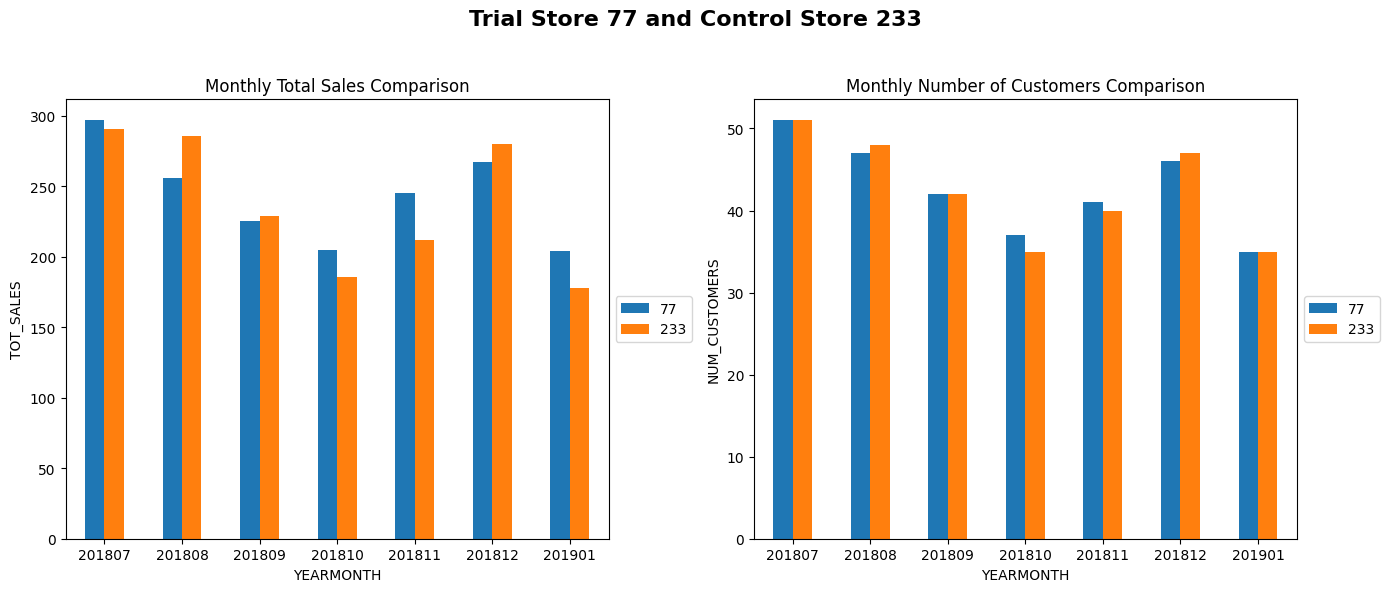

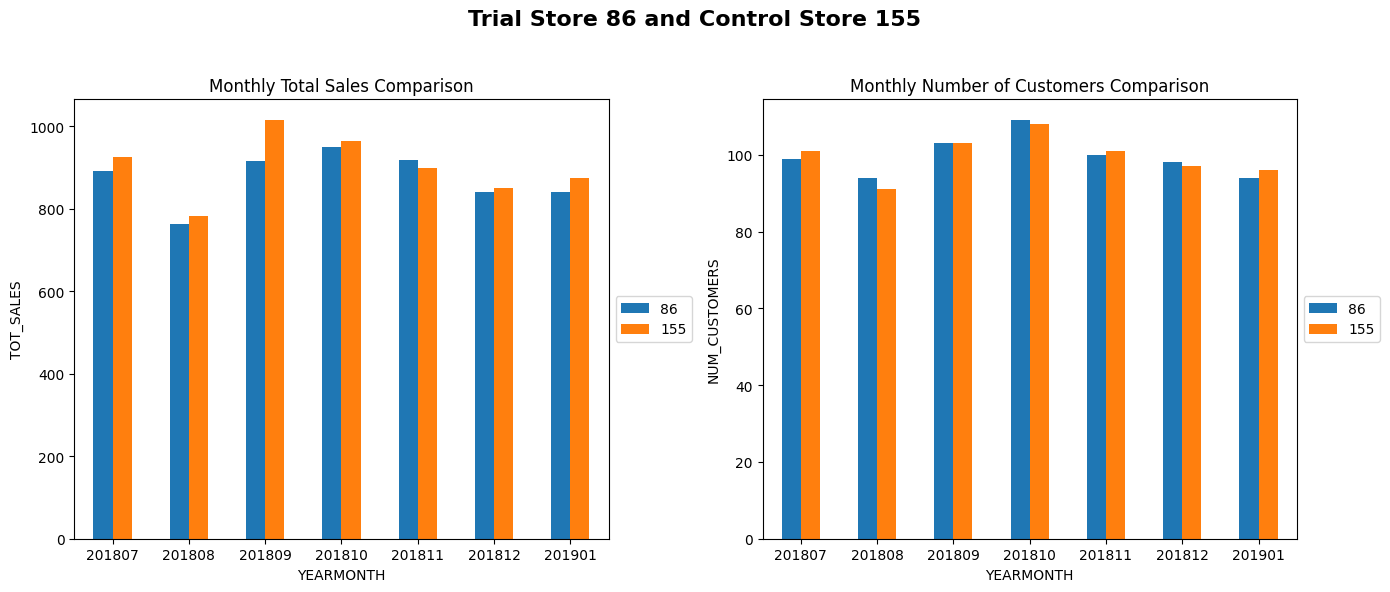

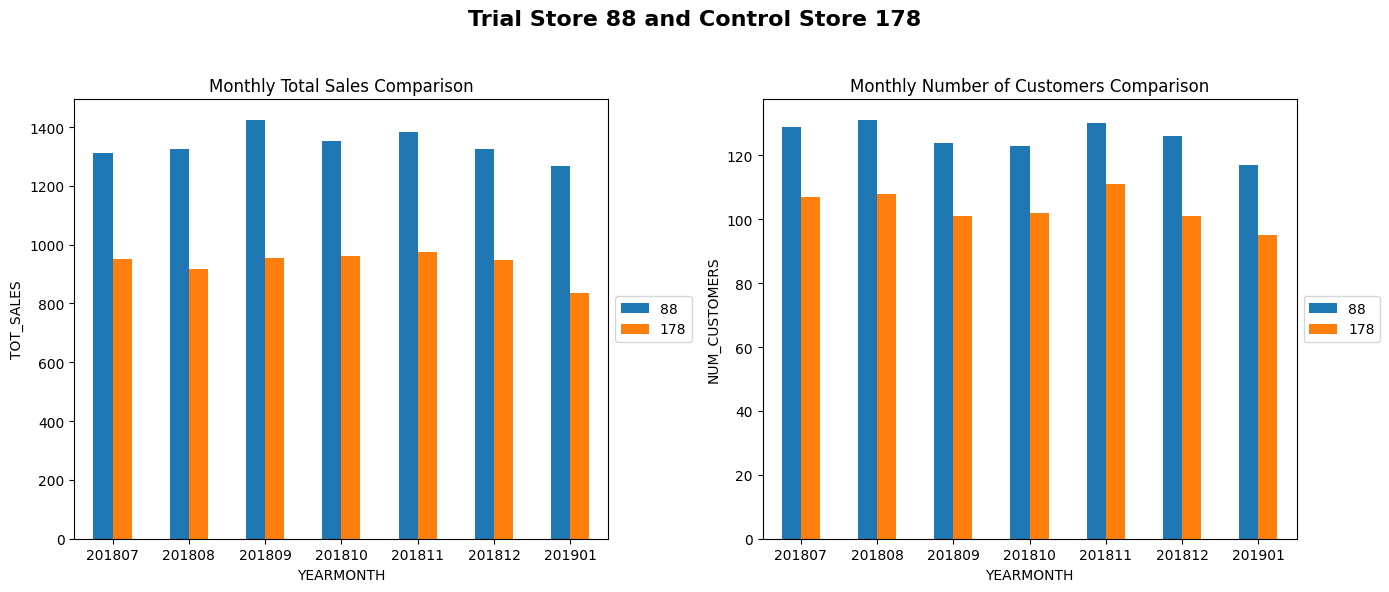

In [652]:
trial_control_dic = {77: 233, 86: 155, 88: 178}

for trial_store, control_store in trial_control_dic.items():
    filtered_data = pre_trial_full_obs[
        pre_trial_full_obs["STORE_NBR"].isin([trial_store, control_store])
    ]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Shared title 
    fig.suptitle(f"Trial Store {trial_store} and Control Store {control_store}", fontsize=16, weight='bold')

    # Plot TOT_SALES
    filtered_data.groupby(["YEARMONTH", "STORE_NBR"]).sum()["TOT_SALES"].unstack().plot.bar(
        ax=axes[0], legend=True
    )
    axes[0].set_title("Monthly Total Sales Comparison", fontsize=12)
    axes[0].set_xlabel("YEARMONTH")
    axes[0].set_ylabel("TOT_SALES")
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Plot NUM_CUSTOMERS
    filtered_data.groupby(["YEARMONTH", "STORE_NBR"]).sum()["NUM_CUSTOMERS"].unstack().plot.bar(
        ax=axes[1], legend=True
    )
    axes[1].set_title("Monthly Number of Customers Comparison", fontsize=12)
    axes[1].set_xlabel("YEARMONTH")
    axes[1].set_ylabel("NUM_CUSTOMERS")
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the shared title
    plt.show()


As a result, we have arrived at potential control stores that are most similar in performance to their respective trial stores based on how they performed PRE trial period.
<br> <br>
This was done through the two measures of correlation and magnitude of distance between metrics. Interestingly, there was not a very great control store to use for trial store 88, (highest comparison score was 0.68 while other trial store's control store had comparison scores above 0.75). The control store for 178 in particular seems to have been chosen mainly for it's strong correlation, lifting and falling in the same manner and scale. The only downside to this control store is that it has less customers and sales, seemingly about 2 thirds of the trial stores sales, and 5 sixths of the trial stores customers. 

## Assessment of the Trial


Trial Period: February 2019 to April 2019. We want to examine the effect of the trial period on the store's metrics. 

To assess whether the trial significantly impacted the performance metrics of a store, we will take the following steps:
- Given a trial store and control store, scale the performance metrics of the control store to the trial store.
- For each month, calculate the percentage difference between the trial and control store on this metric.
- Use this percentage difference to calculate t-values and determine whether the performance of the trial store was ever statistically significantly different to what we expect it to be (the performance of the scaled control store)
- Calculate a 95% confidence interval and visualise the effect of the trial changes on the trial store performance.

It should be noted that through this process, we are assuming that the percentage difference between two stores that are scaled to similar performance is expected to be distributed normally, which is why we are using the t-distribution. 

Let us go through the process with trial store 77 and control store 233, focusing on total sales. 

### Trial Store 77 Control Store 233 Total Sales Analysis

In [653]:
trial_store = 77
control_store = 233

In [654]:
trial_pre_sales = pre_trial_full_obs[pre_trial_full_obs['STORE_NBR'] == trial_store]['TOT_SALES'].sum()

control_pre_sales = pre_trial_full_obs[pre_trial_full_obs['STORE_NBR'] == control_store]['TOT_SALES'].sum()

scale_factor = trial_pre_sales / control_pre_sales

In [655]:
measure_over_time_sales = full_obs.copy(deep=True)
scaled_control_sales = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == control_store]
scaled_control_sales['SCALED_CONTROL_SALES'] = scaled_control_sales['TOT_SALES'] * scale_factor
scaled_control_sales

C:\Users\haru\AppData\Local\Temp\ipykernel_7016\2183492121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_control_sales['SCALED_CONTROL_SALES'] = scaled_control_sales['TOT_SALES'] * scale_factor


,YEARMONTH,STORE_NBR,TOT_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,SCALED_CONTROL_SALES
227,201807,233,290.7,51,1.058824,1.629630,3.303409,297.565550
489,201808,233,285.9,48,1.041667,1.600000,3.573750,292.652187
754,201809,233,228.6,42,1.071429,1.555556,3.265714,233.998916
1019,201810,233,185.7,35,1.028571,1.555556,3.316071,190.085733
1283,201811,233,211.6,40,1.025000,1.512195,3.412903,216.597421
1546,201812,233,279.8,47,1.063830,1.500000,3.730667,286.408121
1809,201901,233,177.5,35,1.000000,1.342857,3.776596,181.692071
2073,201902,233,244.0,45,1.044444,1.489362,3.485714,249.762622
2337,201903,233,199.1,40,1.025000,1.439024,3.374576,203.802205
2603,201904,233,158.6,30,1.066667,1.437500,3.447826,162.345704


In [656]:
trial_sales = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == trial_store]
trial_sales = trial_sales.merge(scaled_control_sales[["YEARMONTH", "SCALED_CONTROL_SALES"]], on=["YEARMONTH"])
trial_sales = trial_sales[["YEARMONTH", "STORE_NBR", "TOT_SALES", "SCALED_CONTROL_SALES"]]

# We are going to leave the percentage difference as a value between 0 and 1 as that is used for the t-value calculation
trial_sales['PERCENTAGE_DIFF'] = ((trial_sales['TOT_SALES'] - trial_sales['SCALED_CONTROL_SALES']) / trial_sales['SCALED_CONTROL_SALES'])

trial_sales

,YEARMONTH,STORE_NBR,TOT_SALES,SCALED_CONTROL_SALES,PERCENTAGE_DIFF
0,201807,77,296.8,297.565550,-0.002573
1,201808,77,255.5,292.652187,-0.126950
2,201809,77,225.2,233.998916,-0.037602
3,201810,77,204.5,190.085733,0.075830
4,201811,77,245.3,216.597421,0.132516
5,201812,77,267.3,286.408121,-0.066716
6,201901,77,204.4,181.692071,0.124980
7,201902,77,235.0,249.762622,-0.059107
8,201903,77,278.5,203.802205,0.366521
9,201904,77,263.5,162.345704,0.623080


Now we are going to calculate the standard deviation of the percentage diff pre trial, using this as our std dev for t-value calculation.

In [657]:
std_dev = trial_sales[trial_sales['YEARMONTH'] < 201902]['PERCENTAGE_DIFF'].std()
print("PERCENTAGE_DIFF Standard Deviation: {:.4f}".format(std_dev))

PERCENTAGE_DIFF Standard Deviation: 0.0996


Degrees of freedom, since there are 8 months in the pre trial period, 8 observations, the degrees of freedom are 8-1 = 7. 

In [658]:
degrees_of_freedom = 7

In [659]:
# The null hypothesis is that there is no difference between the trial store and the scaled control store for this metric.
null_hyp_mean = 0 
trial_sales['T_VALUE'] = (trial_sales['PERCENTAGE_DIFF'] - 0) / std_dev

# Use 0.975, as we will be using 95% CI.
t_critical = stats.t.ppf(0.975, degrees_of_freedom)
print("t_critical = {:.4f}".format(t_critical))

trial_sales['STAT_SIGNIFICANT'] = trial_sales['T_VALUE'] > t_critical

trial_sales

t_critical = 2.3646


,YEARMONTH,STORE_NBR,TOT_SALES,SCALED_CONTROL_SALES,PERCENTAGE_DIFF,T_VALUE,STAT_SIGNIFICANT
0,201807,77,296.8,297.565550,-0.002573,-0.025834,False
1,201808,77,255.5,292.652187,-0.126950,-1.274771,False
2,201809,77,225.2,233.998916,-0.037602,-0.377585,False
3,201810,77,204.5,190.085733,0.075830,0.761452,False
4,201811,77,245.3,216.597421,0.132516,1.330661,False
5,201812,77,267.3,286.408121,-0.066716,-0.669934,False
6,201901,77,204.4,181.692071,0.124980,1.254993,False
7,201902,77,235.0,249.762622,-0.059107,-0.593520,False
8,201903,77,278.5,203.802205,0.366521,3.680430,True
9,201904,77,263.5,162.345704,0.623080,6.256669,True


We can see that for entries 8 and 9, the difference for this metric IS statistically significant, and the trial store performance is higher in this metric, compared to the scaled control store. 

We are now going to concretely calculate the upper and lower bounds for the 95% confidence interval for this metric so we can plot it. Since the standard deviation is based on the percentage diff, we will multiply the metric by the percentage diff std dev to get the changes in the metric.

In [660]:
# We could use 2 instead of the t_critical value, as an approximate 95% CI.
# trial_sales['UPPER_CI'] = trial_sales['SCALED_CONTROL_SALES'] * (1 + (std_dev * 2))
# trial_sales['LOWER_CI'] = trial_sales['SCALED_CONTROL_SALES'] * (1 - (std_dev * 2))
trial_sales['UPPER_CI'] = trial_sales['SCALED_CONTROL_SALES'] * (1 + (std_dev * t_critical))
trial_sales['LOWER_CI'] = trial_sales['SCALED_CONTROL_SALES'] * (1 - (std_dev * t_critical))

In [661]:
trial_sales

,YEARMONTH,STORE_NBR,TOT_SALES,SCALED_CONTROL_SALES,PERCENTAGE_DIFF,T_VALUE,STAT_SIGNIFICANT,UPPER_CI,LOWER_CI
0,201807,77,296.8,297.565550,-0.002573,-0.025834,False,367.637648,227.493452
1,201808,77,255.5,292.652187,-0.126950,-1.274771,False,361.567264,223.737110
2,201809,77,225.2,233.998916,-0.037602,-0.377585,False,289.102052,178.895779
3,201810,77,204.5,190.085733,0.075830,0.761452,False,234.847992,145.323474
4,201811,77,245.3,216.597421,0.132516,1.330661,False,267.602774,165.592069
5,201812,77,267.3,286.408121,-0.066716,-0.669934,False,353.852817,218.963425
6,201901,77,204.4,181.692071,0.124980,1.254993,False,224.477752,138.906390
7,201902,77,235.0,249.762622,-0.059107,-0.593520,False,308.577868,190.947376
8,201903,77,278.5,203.802205,0.366521,3.680430,True,251.794482,155.809929
9,201904,77,263.5,162.345704,0.623080,6.256669,True,200.575614,124.115794


In [662]:
# Plotting variables
bar_width = 0.35
highlight_colour = '#80efed'

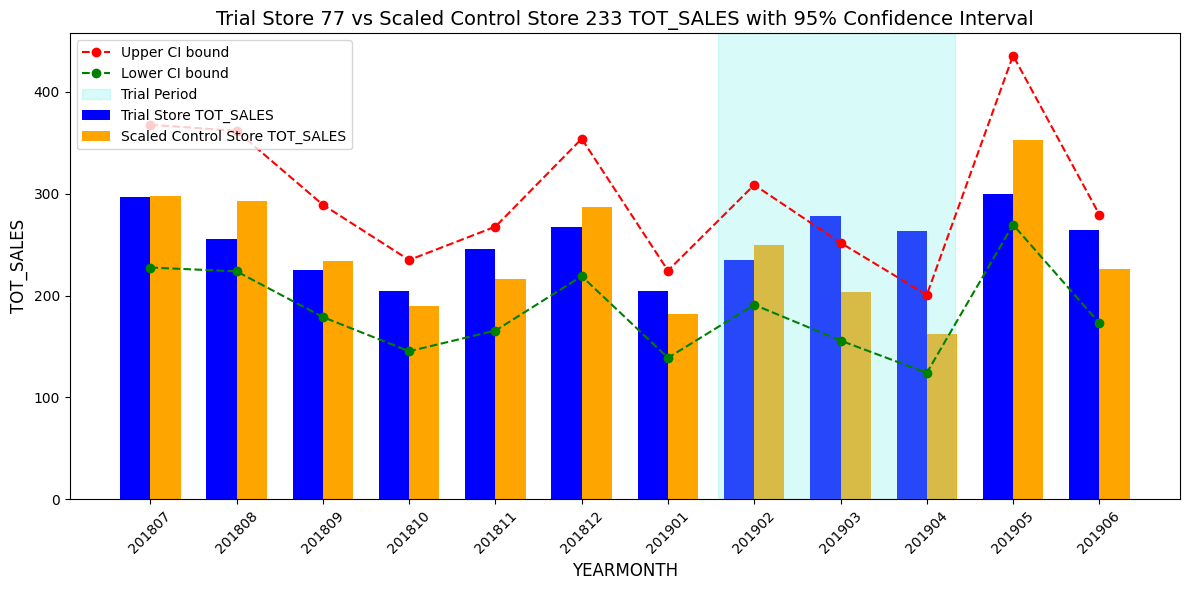

In [663]:
x = trial_sales['YEARMONTH']
index = np.arange(len(x))  

tot_sales = trial_sales['TOT_SALES']
scaled_control_sales = trial_sales['SCALED_CONTROL_SALES']
upper_ci = trial_sales['UPPER_CI']
lower_ci = trial_sales['LOWER_CI']

plt.figure(figsize=(12, 6))
plt.bar(index, tot_sales, bar_width, label='Trial Store TOT_SALES', color='blue')
plt.bar(index + bar_width, scaled_control_sales, bar_width, label='Scaled Control Store TOT_SALES', color='orange')

plt.plot(index + bar_width / 2, upper_ci, color='red', linestyle='--', marker="o", label='Upper CI bound')
plt.plot(index + bar_width / 2, lower_ci, color='green', linestyle='--', marker="o", label='Lower CI bound')

plt.axvspan(
    6.75, 9.5,
    color=highlight_colour,
    alpha=0.3,
    label="Trial Period"
)

plt.xlabel('YEARMONTH', fontsize=12)
plt.ylabel('TOT_SALES', fontsize=12)
plt.title('Trial Store 77 vs Scaled Control Store 233 TOT_SALES with 95% Confidence Interval', fontsize=14)
plt.xticks(index + bar_width / 2, x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

We can see the change in TOT_SALES over time, and more importantly, the effect that the trial had on the trial store during the trial period. Two out of three months during the trial period, March and April of 2019, we see that the trial had a positive influence on the number of total sales made during these months. This is because their sales are higher than the upper bound of where we are 95% confident that the scaled control sales would lie during that period. 

This process will be repeated for the following pairs of trial and control stores:
- Trial Store 77, Control Store 233
- Trial Store 86, Control Store 155
- Trial Store 88, Control Store 178

For the TOT_SALES and NUM_CUSTOMERS metrics

We can distill this whole process into a single function, that simply returns the visualisations.

In [664]:
def assess_trial(trial_store, control_store, metric):    
    trial_pre = pre_trial_full_obs[pre_trial_full_obs['STORE_NBR'] == trial_store][metric].sum()

    control_pre = pre_trial_full_obs[pre_trial_full_obs['STORE_NBR'] == control_store][metric].sum()

    scale_factor = trial_pre / control_pre

    measure_over_time_metric = full_obs.copy(deep=True)
    scaled_control_metric = measure_over_time_metric[measure_over_time_metric['STORE_NBR'] == control_store]
    # scaled_control_metric['SCALED_CONTROL_METRIC'] = scaled_control_metric[metric] * scale_factor
    # scaled_control_metric.loc[:, 'SCALED_CONTROL_METRIC'] = scaled_control_metric[metric] * scale_factor
    # Making a copy removes the warning
    scaled_control_metric = scaled_control_metric.copy()
    scaled_control_metric['SCALED_CONTROL_METRIC'] = scaled_control_metric[metric] * scale_factor

    
    comparison_table = measure_over_time_metric[measure_over_time_metric['STORE_NBR'] == trial_store]

    comparison_table = comparison_table.merge(scaled_control_metric[["YEARMONTH", "SCALED_CONTROL_METRIC"]], on=["YEARMONTH"])

    comparison_table = comparison_table[["YEARMONTH", "STORE_NBR", metric, "SCALED_CONTROL_METRIC"]]
    comparison_table['PERCENTAGE_DIFF'] = ((comparison_table[metric] - comparison_table['SCALED_CONTROL_METRIC']) / comparison_table['SCALED_CONTROL_METRIC'])

    std_dev = comparison_table[comparison_table['YEARMONTH'] < 201902]['PERCENTAGE_DIFF'].std()
    print("PERCENTAGE_DIFF Standard Deviation: {:.4f}".format(std_dev))

    degrees_of_freedom = 7

    comparison_table['T_VALUE'] = (comparison_table['PERCENTAGE_DIFF'] - 0) / std_dev

    t_critical = stats.t.ppf(0.975, degrees_of_freedom)

    comparison_table['STAT_SIGNIFICANT'] = comparison_table['T_VALUE'] > t_critical

    comparison_table['UPPER_CI'] = comparison_table['SCALED_CONTROL_METRIC'] * (1 + (std_dev * t_critical))
    comparison_table['LOWER_CI'] = comparison_table['SCALED_CONTROL_METRIC'] * (1 - (std_dev * t_critical))

    # == PLOTTING
    x = comparison_table['YEARMONTH']
    index = np.arange(len(x)) 

    metric_data = comparison_table[metric]
    scaled_control_metric = comparison_table['SCALED_CONTROL_METRIC']
    upper_ci = comparison_table['UPPER_CI']
    lower_ci = comparison_table['LOWER_CI']

    plt.figure(figsize=(12, 6))
    plt.bar(index, metric_data, bar_width, label=f'Trial Store {metric}', color='blue')
    plt.bar(index + bar_width, scaled_control_metric, bar_width, label=f'Scaled Control Store {metric}', color='orange')

    plt.plot(index + bar_width / 2, upper_ci, color='green', linestyle='--', marker = "o", label='Upper CI bound')
    plt.plot(index + bar_width / 2, lower_ci, color='red', linestyle='--', marker = "o", label='Lower CI bound')

    plt.axvspan(
        6.75, 9.5,
        color=highlight_colour,
        alpha=0.3,
        label="Trial Period"
    )

    plt.xlabel('YEARMONTH', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.title(f'Trial Store {trial_store} vs Scaled Control Store {control_store} {metric} with 95% Confidence Interval', fontsize=14)
    plt.xticks(index + bar_width / 2, x, rotation=45) 
    plt.legend()
    plt.tight_layout()
    plt.show()

======================== TRIAL STORE 77 vs CONTROL STORE 233 ========================
======================== TOT_SALES COMPARISON ========================
PERCENTAGE_DIFF Standard Deviation: 0.0996


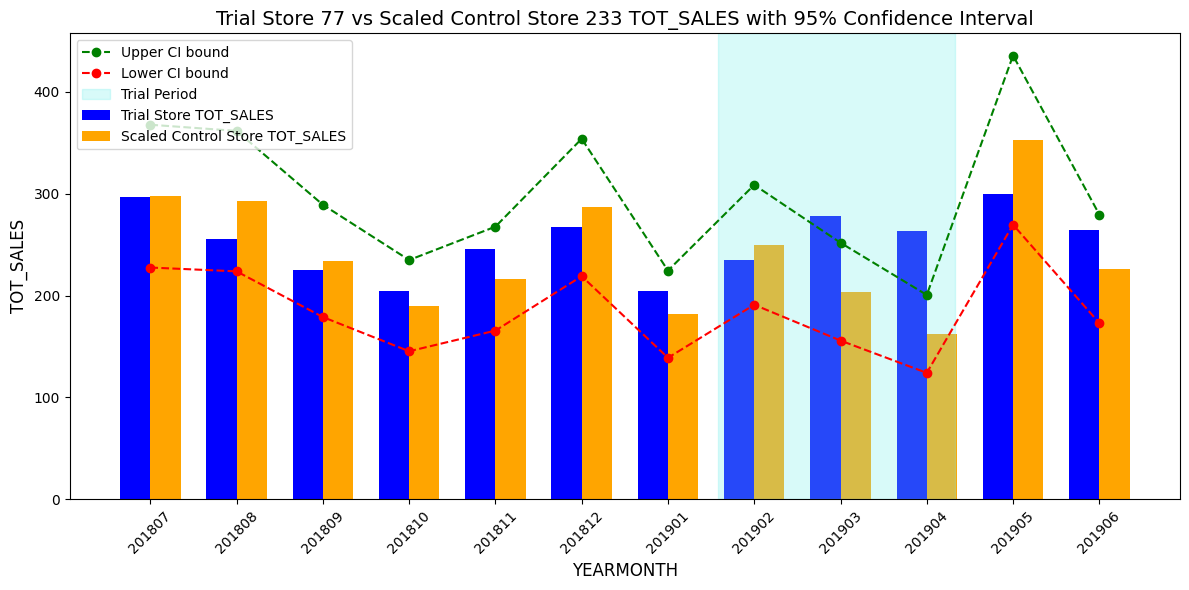

======================== NUM_CUSTOMERS COMPARISON ========================
PERCENTAGE_DIFF Standard Deviation: 0.0274


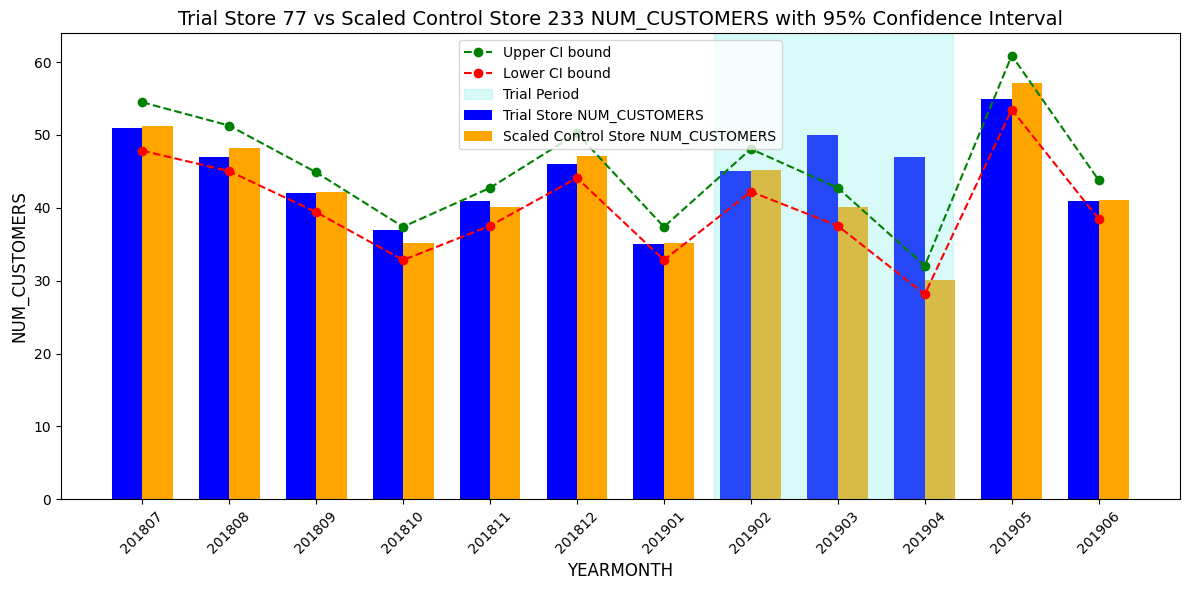



======================== TRIAL STORE 86 vs CONTROL STORE 155 ========================
======================== TOT_SALES COMPARISON ========================
PERCENTAGE_DIFF Standard Deviation: 0.0377


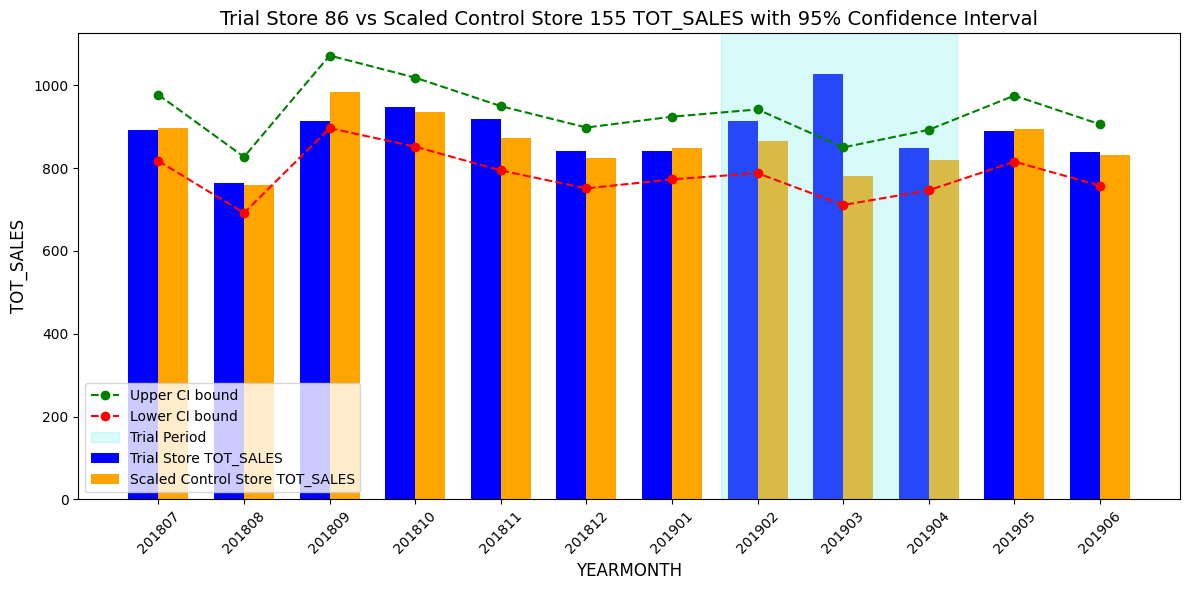

======================== NUM_CUSTOMERS COMPARISON ========================
PERCENTAGE_DIFF Standard Deviation: 0.0192


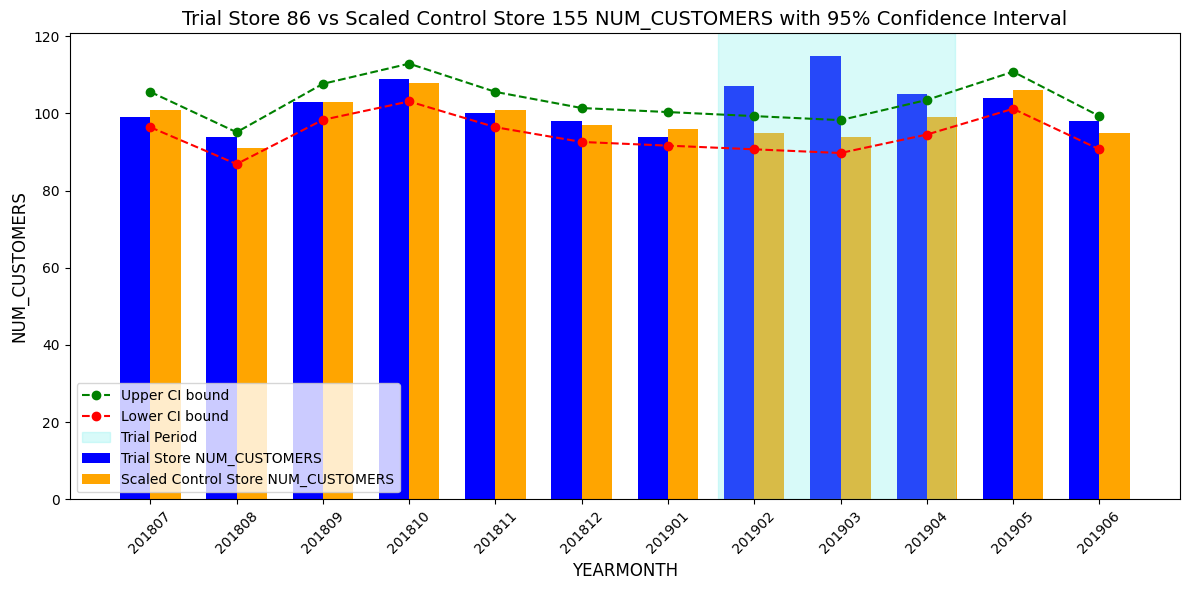



======================== TRIAL STORE 88 vs CONTROL STORE 178 ========================
======================== TOT_SALES COMPARISON ========================
PERCENTAGE_DIFF Standard Deviation: 0.0352


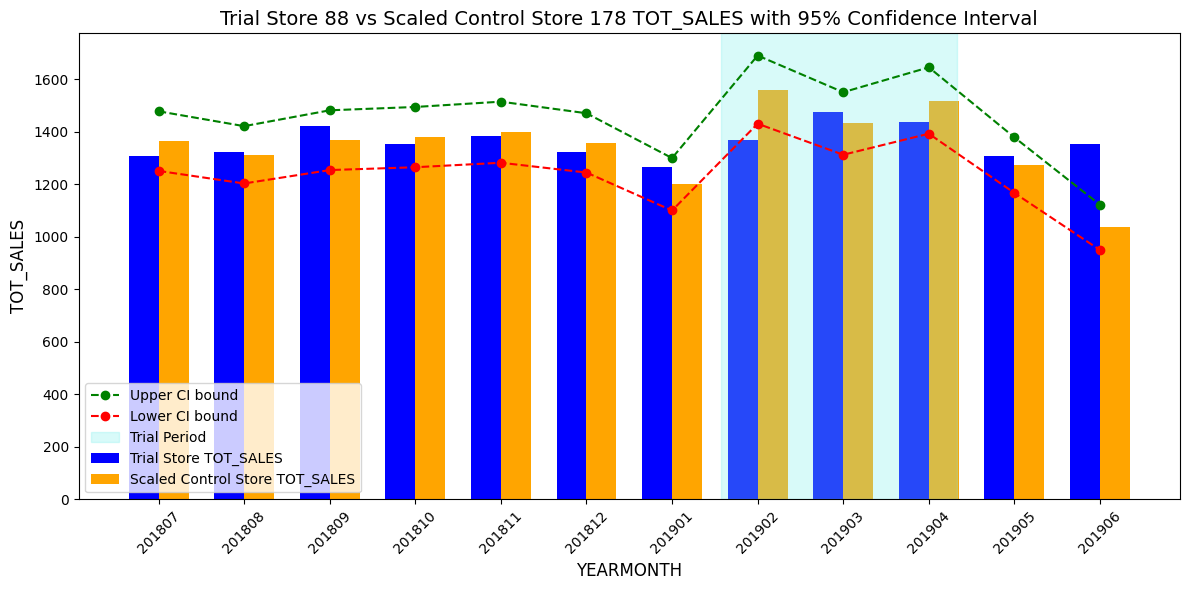

======================== NUM_CUSTOMERS COMPARISON ========================
PERCENTAGE_DIFF Standard Deviation: 0.0202


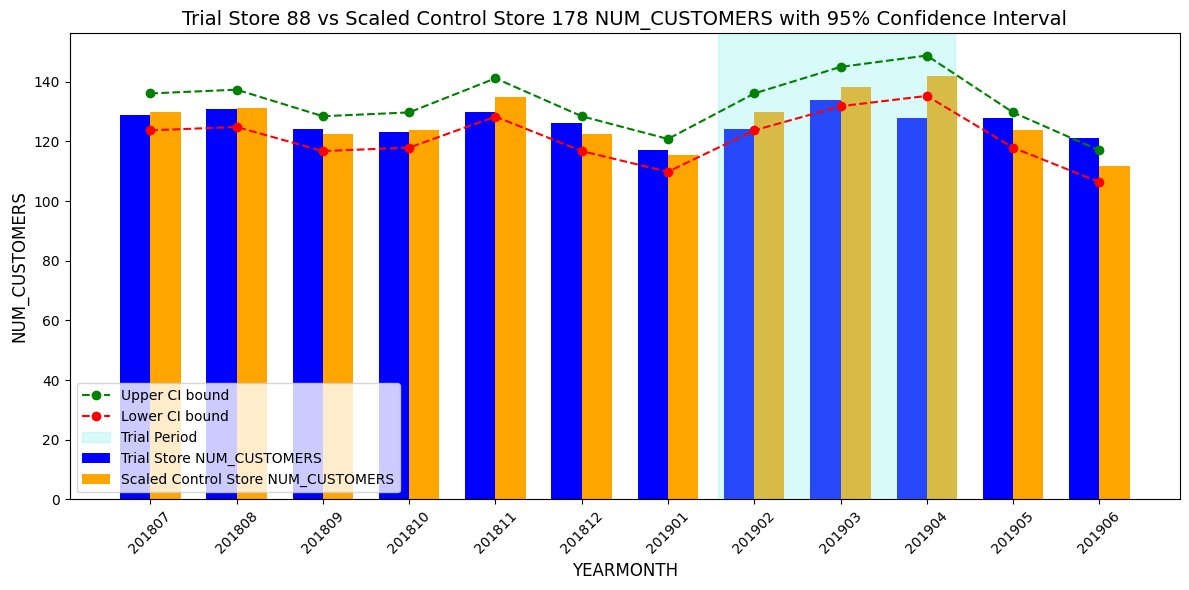

In [665]:
for trial_store, control_store in trial_control_dic.items():
    print(f"======================== TRIAL STORE {trial_store} vs CONTROL STORE {control_store} ========================")
    print("======================== TOT_SALES COMPARISON ========================")
    assess_trial(trial_store, control_store, 'TOT_SALES')
    print("======================== NUM_CUSTOMERS COMPARISON ========================")
    assess_trial(trial_store, control_store, 'NUM_CUSTOMERS')
    print("\n")

# Conclusion

The trial stores 77, 86, 88 each were alloted the respective control stores 233, 155 and 178, after analysis pertaining to correlation and magnitude of distance in the TOT_SALES and NUM_CUSTOMERS categories. 

## Trial Store 77 and Control Store 233

Observations:
- TOT_SALES and NUM_CUSTOMERS increased significantly in March and April of 2019. Two of the three months in the trial period (February 2019 - April 2019). February appeared to remain similar to the control store in both metrics.
- The standard deviation for TOT_SALES was higher compared to other trial store and control store comparisons. There was a wider spread that the TOT_SALES could have taken. 

## Trial Store 86 and Control Store 155

Observations:
- For only the month of March within the trial period, the total sales was significantly higher than the control store.
- For all months (Feb, March, April) within the trial period, the trial store had a significantly higher number of customers.
- Overall it appears the store benefited from the trial. 

## Trial Store 88 and Control Store 178

Observations:
- In February, the total sales was significantly less than expected compared to the scaled control stores sales.
- In April, the number of customers was significantly less than expected compared to the scaled control stores number of customers.
- Throughout the trial period, the trial store seems to be closer to the lower bound in terms of the number of customers it pulled. The number of sales also seems to be less than expected, except in March when it performed regularly. 

It should be noted that for this trial store, as aforementioned, has the lowest comparison score, making it an indicator that store 88 is unique compared to other stores. This makes it harder to provide a definitive answer of whether the trial affected the store in a positive/negative way.

### Overall

Ultimately, from the analysis, it seems that the trial was in general a positive influence on the total sales and number of customers generated by the trial store. 
<br> <br>
Trial Store 77 seems to have benefited the most from the trial, as for both March and April, the total sales and number of customers was significantly higher than it's respective control store.
<br> <br>
Trial Store 86 on the otherhand experienced the most significant and constant increase in it's number of customers, however in regards to its total sales, only February showed a significant increase.
<br> <br>
Trial Store 88 did not seem to benefit from the trial compared to it's control store. 